#Julia Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from datetime import datetime
from numba import jit
from numba import njit
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

In [10]:
# Original Function
def function_of_z(z, b):
    return ((z**2 + 1)/(2*z))**b

In [11]:
# Checking if the random numbers converge towards, a fixed point, lies on a boundary or goes to infinity/NaN.
# Here, we are taking complex numbers.3
def check_for_divergence(z):
    z_array = np.zeros(30, dtype=complex)
    z_array[0] = z

    for i in range(1, len(z_array)):
        z_array[i] = function_of_z(z_array[i-1], 2)
        if np.isnan(z_array[i]):
            break

    if any(np.isnan(z_array)):
        return 0, 0
    epsilon = 10**-100
    if abs(z_array[-1].real - 1) < epsilon or abs(z_array[-1].imag - 1) < epsilon:
        return 1, z
    else:
        return 2, z

In [12]:
# Generating the random numbers. We have used datetime as the seed to inroduce more randomness.
start = time.time()
random.seed(datetime.now().timestamp())
random_array = np.zeros(10**10, dtype=complex)
x, y = 0, 0
for i in range(0, 10**7):
    x = random.uniform(-4, 4) # Returns a random floating number between the two specified numbers
    y = random.uniform(-8, 8)
    random_array[i] = complex(x, y)
end = time.time()
print(end-start)

12.373016119003296


In [13]:
start = time.time()

check_list = []
check_list_flow = []

for i in range(0, 10**6):
    check_num, z = check_for_divergence(random_array[i])
    if check_num == 1 and check_num != 0:
        check_list.append(random_array[i])
    elif check_num == 2 and check_num != 0:
        check_list_flow.append(random_array[i])
        # Checking whether a random number is one of the four fixed points, lies on the boundary or elsewhere.

    '''if check_for_divergence(random_array[i])[0] == 1:
        check_list.append(random_array[i])'''

end=time.time() # We have start and end time to see the computational efficiency.
print(end-start)

check_array = np.array(check_list)
check_array_flow = np.array(check_list_flow)

<ipython-input-10-1c8cd75994f0>:3: RuntimeWarning: overflow encountered in scalar power
  return ((z**2 + 1)/(2*z))**b
<ipython-input-10-1c8cd75994f0>:3: RuntimeWarning: invalid value encountered in scalar power
  return ((z**2 + 1)/(2*z))**b
<ipython-input-10-1c8cd75994f0>:3: RuntimeWarning: invalid value encountered in scalar divide
  return ((z**2 + 1)/(2*z))**b
<ipython-input-10-1c8cd75994f0>:3: RuntimeWarning: overflow encountered in scalar divide
  return ((z**2 + 1)/(2*z))**b
<ipython-input-10-1c8cd75994f0>:3: RuntimeWarning: invalid value encountered in scalar multiply
  return ((z**2 + 1)/(2*z))**b


38.856112480163574


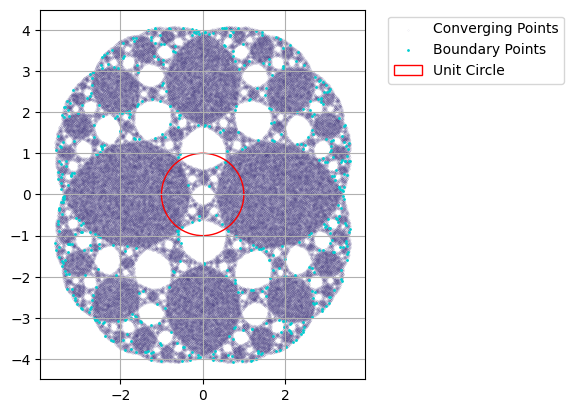

In [14]:
plt.scatter(check_array.real, check_array.imag, color = 'darkslateblue', s = 0.001, label = 'Converging Points')
plt.scatter(check_array_flow.real, check_array_flow.imag, color = 'darkturquoise', s = 1, label = 'Boundary Points')
plt.gca().set_aspect('equal')
circle1 = plt.Circle((0, 0), 1, color='r', fill = False, lw = 1, label = 'Unit Circle')
plt.gca().add_patch(circle1)

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Julia Set with Numba

In [2]:
@njit(fastmath = True)
# Original Function
def function_of_z(z, b):
    return ((z**2 + 1)/(2*z))**b

In [3]:
# Generating random numbers
@njit
def generate_random_numbers():
    some_arr = np.zeros(10**7, dtype=np.complex128) # define length
    x, y = 0, 0
    for i in range(0, 10**7):
        x = random.uniform(-4, 4)
        y = random.uniform(-8, 8)
        some_arr[i] = complex(x, y)
    return some_arr

In [4]:
start = time.time()
some_arr = generate_random_numbers()
end = time.time()
print(end-start)

1.0751209259033203


In [5]:
@njit(fastmath = True)
def check_for_divergence(z):
    z_array = np.zeros(30, dtype=np.complex128)
    z_array[0] = z

    for i in range(1, len(z_array)):
        z_array[i] = function_of_z(z_array[i-1], 2)
        if np.isnan(z_array[i]):
            break

    for j in range(0, len(z_array)):
        if np.isnan(z_array[j]):
            return 0, 0

    epsilon = 10**-100

    if abs(z_array[-1].real - 1) < epsilon or abs(z_array[-1].imag - 1) < epsilon:
        return 1, z
    else:
        return 2, z

In [6]:
@njit
def final_array(some_array):
    bound = np.zeros(10**8, dtype=np.complex128)
    conv = np.zeros(10**8, dtype=np.complex128)

    for i in range(0, len(some_array)):
        try:
          check, z = check_for_divergence(some_array[i])
          if check == 1:
              conv[i] = some_array[i]
          elif check == 2:
              bound[i] = some_array[i]
        except:
            pass

    return bound, conv

In [7]:
run_1_bp, run_1_cp = final_array(some_arr)

In [8]:
# plt.scatter(run_1_cp.real, run_1_cp.imag, color = 'darkslateblue', s = 0.001, label = 'Converging Points', alpha = 0.1)
# plt.scatter(run_1_bp.real, run_1_bp.imag, color = 'darkturquoise', s = 1, label = 'Boundary Points')
# plt.gca().set_aspect('equal')
# circle1 = plt.Circle((0, 0), 1, color='r', fill = False, lw = 1, label = 'Unit Circle')
# plt.gca().add_patch(circle1)

# plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show()

In [14]:
# sns.scatterplot(x=run_1_cp.real, y=run_1_cp.imag, color='darkslateblue', s=1, label='Converging Points', alpha=0.1)
# sns.scatterplot(x=run_1_bp.real, y=run_1_bp.imag, color='darkturquoise', s=1, label='Boundary Points')

# plt.gca().set_aspect('equal')
# circle1 = plt.Circle((0, 0), 1, color='r', fill=False, lw=1, label='Unit Circle')
# plt.gca().add_patch(circle1)

# plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show()

In [8]:
a = run_1_cp.real
b = run_1_cp.imag
c = run_1_bp.real
d = run_1_bp.imag

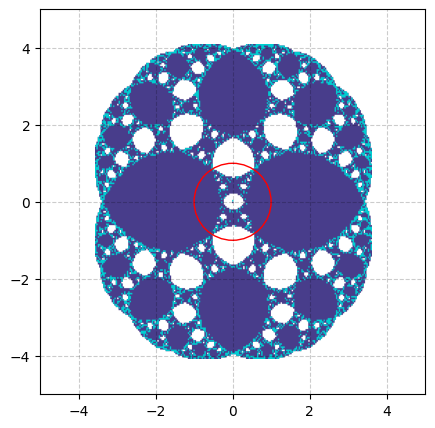

In [9]:
run_1_cp = pd.DataFrame({'x': a, 'y': b})
run_1_bp = pd.DataFrame({'x': c, 'y': d})

# Creating a canvas
cvs = ds.Canvas(plot_width=200, plot_height=200)

# Aggregating the points using datashader
agg_cp = cvs.points(run_1_cp, 'x', 'y')
agg_bp = cvs.points(run_1_bp, 'x', 'y')

img_cp = tf.shade(agg_cp, cmap=['darkslateblue'])
img_bp = tf.shade(agg_bp, cmap=['darkturquoise'])

# Creating the unit circle
theta = np.linspace(0, 2*np.pi, 100)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# Creating the plot as an image
img_circle = tf.shade(cvs.points(pd.DataFrame({'x': unit_circle_x, 'y': unit_circle_y}), 'x', 'y'), cmap=['red'])

# Displaying the images using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(img_cp.to_pil(), extent=[run_1_cp['x'].min(), run_1_cp['x'].max(), run_1_cp['y'].min(), run_1_cp['y'].max()])
ax.imshow(img_bp.to_pil(), extent=[run_1_bp['x'].min(), run_1_bp['x'].max(), run_1_bp['y'].min(), run_1_bp['y'].max()])
# ax.imshow(img_circle.to_pil(), extent=[-1, 1, -1, 1], alpha=0.5, cmap='Reds')

ax.grid(True, linestyle='--', color='black', alpha=0.2)
circle = plt.Circle((0, 0), 1, color='red', fill=False, lw=1, label='Unit Circle')
ax.add_patch(circle)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

ax.set_aspect('equal')

plt.show()